Jupyter Notebook to Generate Sequence Graphs

In [21]:
# x-axis values for all charts
num_datapoints = 5
base_num_kmers = 10
base_num_iterations = 100
base_num_seqs = 100
base_seqs_len = 2000

num_iterations = [base_num_iterations * pow(2, i) \
                  for i in range(num_datapoints)]
kmer_lens = [base_num_kmers * pow(2, i) for i in range(num_datapoints)]
seq_nums = [base_num_seqs * pow(2, i) for i in range(num_datapoints)]
seq_lens = [base_seqs_len * pow(2, i) for i in range(num_datapoints)]

In [22]:
print('num iterations: ', num_iterations)
print('kmer lengths: ', kmer_lens)
print('number of sequences: ', seq_nums)
print('lengths of sequences: ', seq_lens)

num iterations:  [100, 200, 400, 800, 1600]
kmer lengths:  [10, 20, 40, 80, 160]
number of sequences:  [100, 200, 400, 800, 1600]
lengths of sequences:  [2000, 4000, 8000, 16000, 32000]


In [23]:

# runtimes for different numbers of iterations 
sequential_num_iteration_runtimes = [63, 126, 253, 504, 1012]
parallel_num_iteration_runtimes = [160, 177, 221, 315, 483]

# runtimes for different length kmers 
sequential_kmer_runtimes = [63, 103, 195, 401, 797]
parallel_kmer_runtimes = [161, 160, 161, 168, 178]

# runtimes for different numbers of sequences
sequential_seq_nums_runtimes = [63, 71, 88, 123, 191]
parallel_seq_nums_runtimes = [158, 157, 172, 196, 239]
# testing w/ 10,000 sequences
    # sequential: 931
    # parallel: 622

# runtimes for different sequence lengths
sequential_seq_lens_runtimes = [65, 117, 225, 444, 880]
parallel_seq_lens_runtimes = [167, 163, 183, 213, 304]

In [24]:
import matplotlib.pyplot as plt

def generate_line_chart(x_vals, sequential_vals, parallel_vals, x_val_label='NO LABEL'):
    _, ax1 = plt.subplots()
    sequential_color = 'tab:blue'
    parallel_color = 'tab:green'
    speedup_color = 'tab:red'

    # runtime graphs
    
    ax1.plot(x_vals, sequential_vals, color=sequential_color, label='Sequential Runtime')
    ax1.plot(x_vals, parallel_vals, color=parallel_color, label='Parallel Runtime')
    ax1.set_xlabel(x_val_label)
    ax1.set_ylabel('Runtimes')

    # speedup graph
    ax2 = ax1.twinx()
    speedups = [s / p for s, p in zip(sequential_vals, parallel_vals)]
    ax2.plot(x_vals, speedups, color=speedup_color, label='Speedup')
    ax2.set_ylabel('Speedup')
    ax2.tick_params(axis='y')

    # legend
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc='upper left')

    plt.show()



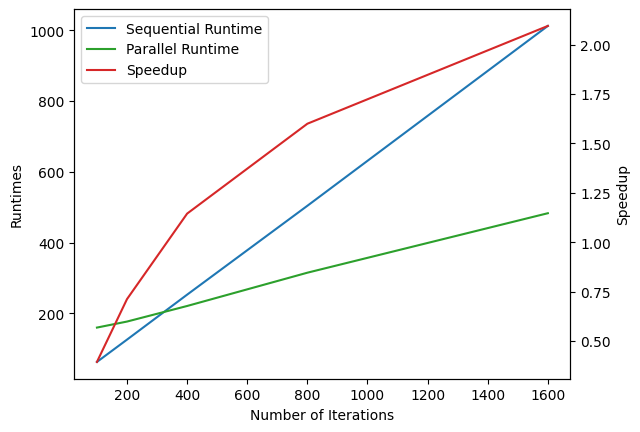

In [25]:
# num iterations chart
generate_line_chart(num_iterations, sequential_num_iteration_runtimes, parallel_num_iteration_runtimes, 'Number of Iterations')

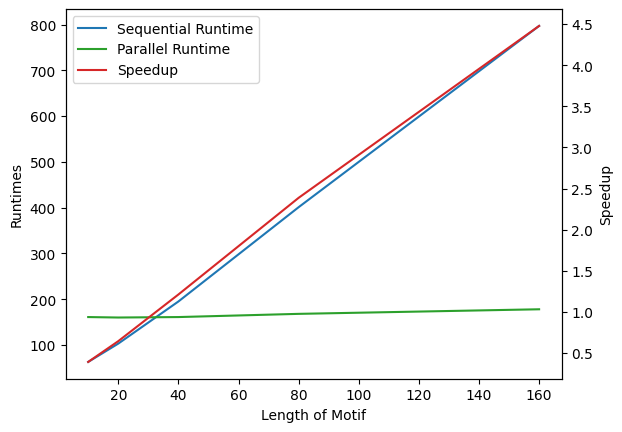

In [26]:
# kmer length chart 
generate_line_chart(kmer_lens, sequential_kmer_runtimes, parallel_kmer_runtimes, 'Length of Motif')

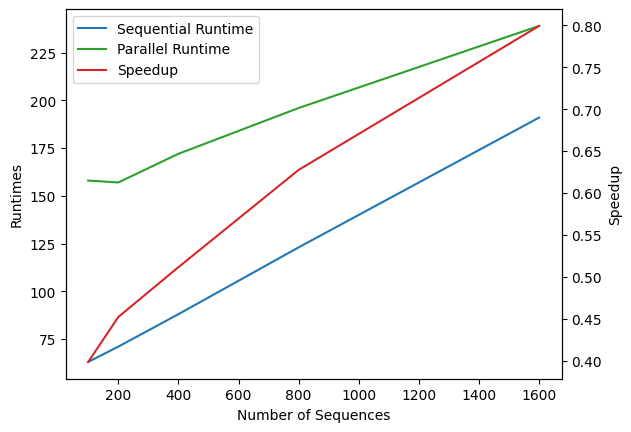

In [27]:
# sequence number runtimes
generate_line_chart(seq_nums, sequential_seq_nums_runtimes, parallel_seq_nums_runtimes, 'Number of Sequences')

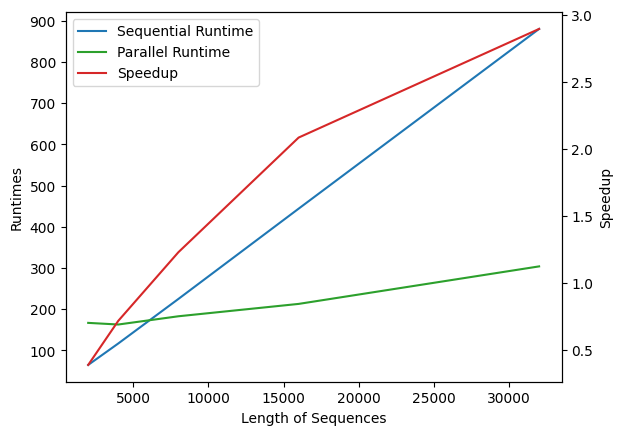

In [29]:
# sequence length runtimes
generate_line_chart(seq_lens, sequential_seq_lens_runtimes, parallel_seq_lens_runtimes, 'Length of Sequences')